In [2]:
import matplotlib.pyplot as plt
import numpy as np

import camb

In [3]:
def get_lensing_camb(omb, omc):
    pars = camb.set_params(H0 = 67.4, ombh2 = omb, omch2 = omc, lmax=lm)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    lensed = powers['total'][2:lm, 0]
    unlensed = powers['unlensed_total'][2:lm, 0]
    return lensed/unlensed

In [4]:
lm = 5000

In [40]:
omcs = [0.11, 0.12, 0.13]
ombs = [0.0324, 0.0224, 0.0124]

In [41]:
ells = np.array([l for l in range(2, lm)])

In [42]:
n = len(omcs)
lensings_camb = [get_lensing_camb(ombs[i], omcs[i]) for i in range(n)]

In [43]:
label_key = ["$\\Omega_bh^2$ = " + str(ombs[i]) + ", $\\Omega_ch^2$ = " + str(omcs[i]) + ", $\\Omega_mh^2$ = " + str(omcs[i] + ombs[i]) for i in range(n)]

fid_ombh2 = 0.0224
fid_omch2 = 0.12

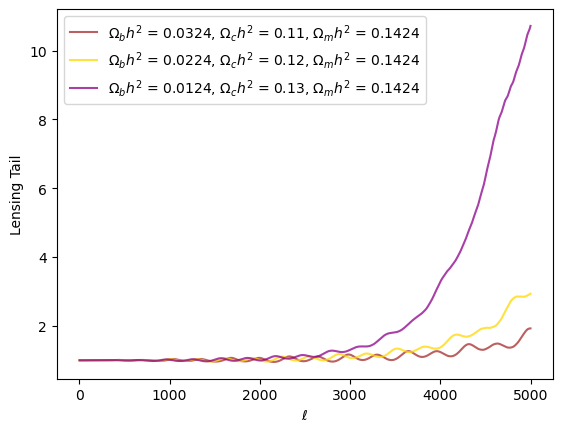

In [44]:
color_key = ["brown","gold","darkmagenta", "pink", "darkgreen", "aqua", "slateblue", "palegreen", "crimson", "blue", "lime"]
for i in range(n):
    plt.plot(ells, lensings_camb[i], color = color_key[i], label = label_key[i], alpha = 0.75)
plt.xlabel("$\\ell$")
plt.ylabel("Lensing Tail")
plt.legend()
plt.show()